# NMDA without self-influence effects on recall time

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '17263ba46c044874f5e868dcdbb93f23c25019d8'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [8]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences, subsequence, calculate_timings
from connectivity_functions import create_artificial_manager 

## NMDA

In [9]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
n_patterns = 10

dt = 0.001


beta = False
value = 3
inhibition = -1.0
extension = 2
decay_factor = 0.1
sequence_decay = 0.0
ampa = True
self_influence = False

tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

T_recall = 5.0
T_cue = 0.100
n = 10

sequences = [[i for i in range(n_patterns)]]

g_w_range = np.arange(1, 33, 3)

In [10]:
mean_g_w = []
std_g_w = []
total_g_w = []
successes_g_w = []

for g_w in g_w_range:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension, decay_factor,
                                        sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta, beta_decay=False,
                                        self_influence=self_influence)
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa

    success = calculate_recall_success_sequences(manager, T_recall, T_cue, n, sequences)
    timings = calculate_timings(manager, remove=0.010)

    patterns = [x[0] for x in timings]

    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0


    mean_g_w.append(mean)
    std_g_w.append(std)
    total_g_w.append(total_sequence_time)
    successes_g_w.append(success)


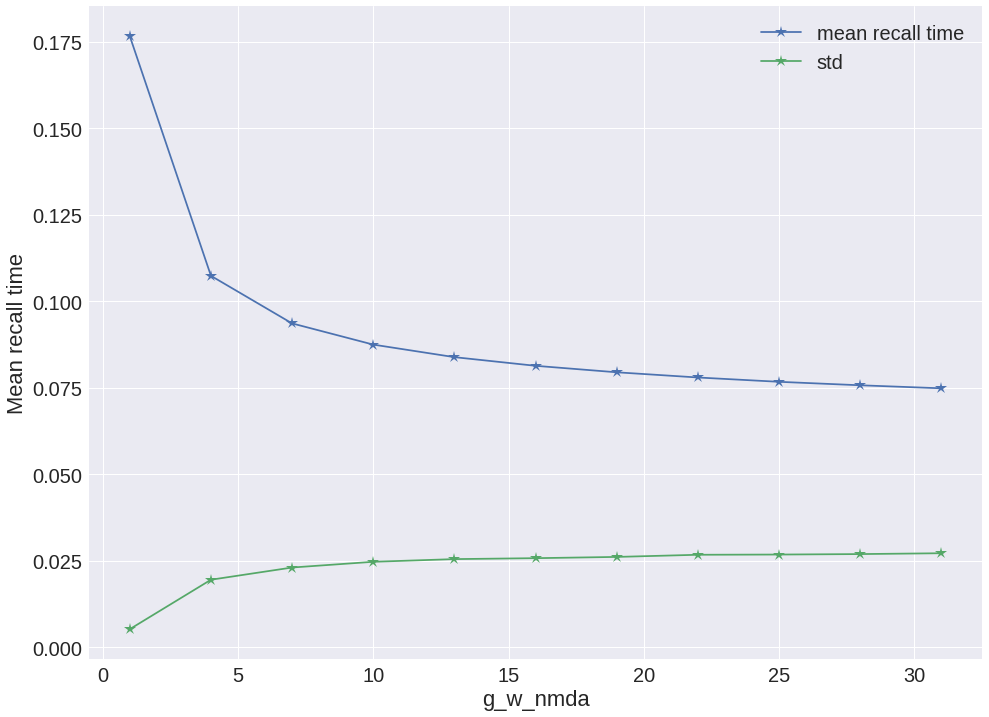

In [11]:
# Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_w_range, mean_g_w, '*-', markersize=13, label='mean recall time')
ax.plot(g_w_range, std_g_w, '*-', markersize=13, label='std')

ax.set_xlabel('g_w_nmda')
ax.set_ylabel('Mean recall time')

ax.legend();

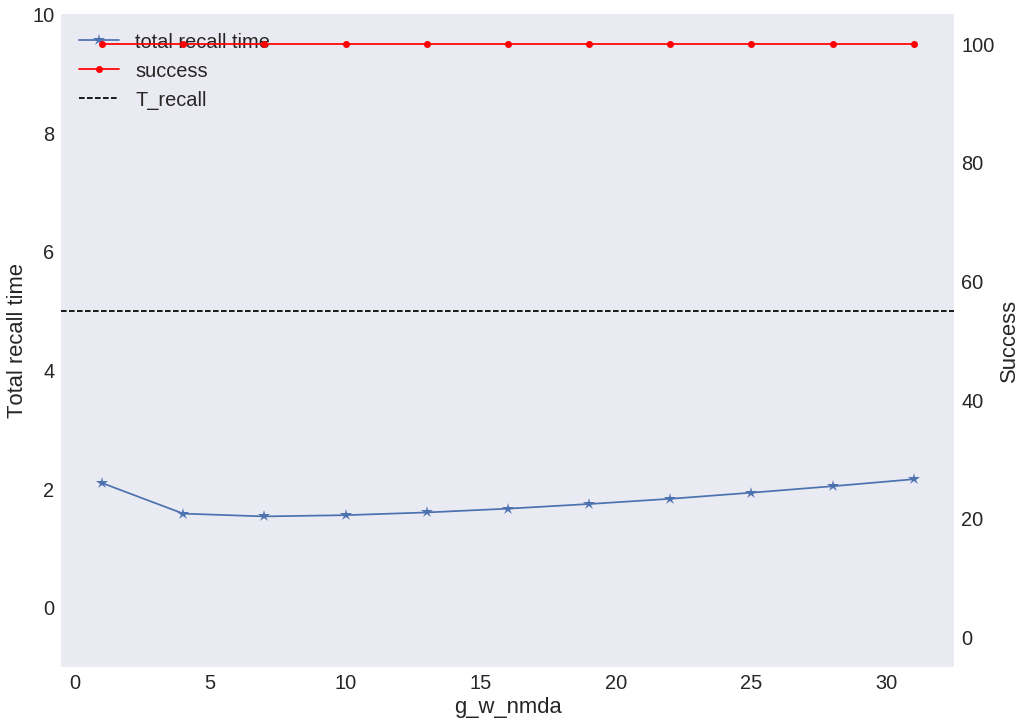

In [13]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(g_w_range, total_g_w, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('g_w_nmda')
ax.set_ylabel('Total recall time')

axt = ax.twinx()
lns2 = axt.plot(g_w_range, successes_g_w, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### AMPA

In [27]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
n_patterns = 10

dt = 0.001


beta = False
value = 3
inhibition = -1.0
extension = 2
decay_factor = 0.1
sequence_decay = 0.0
ampa = True
self_influence = False

tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

T_recall = 20.0
T_cue = 0.100
n = 10

sequences = [[i for i in range(n_patterns)]]

g_w_ampa_range = np.arange(1, 8, 1)

In [28]:
mean_g_w_ampa = []
std_g_w_ampa = []
total_g_w_ampa = []
successes_g_w_ampa = []

for g_w_ampa in g_w_ampa_range:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension, decay_factor,
                                        sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta, beta_decay=False,
                                        self_influence=self_influence)
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa

    success = calculate_recall_success_sequences(manager, T_recall, T_cue, n, sequences)
    timings = calculate_timings(manager, remove=0.010)

    patterns = [x[0] for x in timings]

    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0


    mean_g_w_ampa.append(mean)
    std_g_w_ampa.append(std)
    total_g_w_ampa.append(total_sequence_time)
    successes_g_w_ampa.append(success)


In [29]:
g_w_ampa_range 
mean_g_w_ampa

[0.176875,
 0.36649999999999999,
 0.70374999999999999,
 1.1796250000000001,
 1.7732500000000002,
 2.5323333333333333,
 3.6004999999999998]

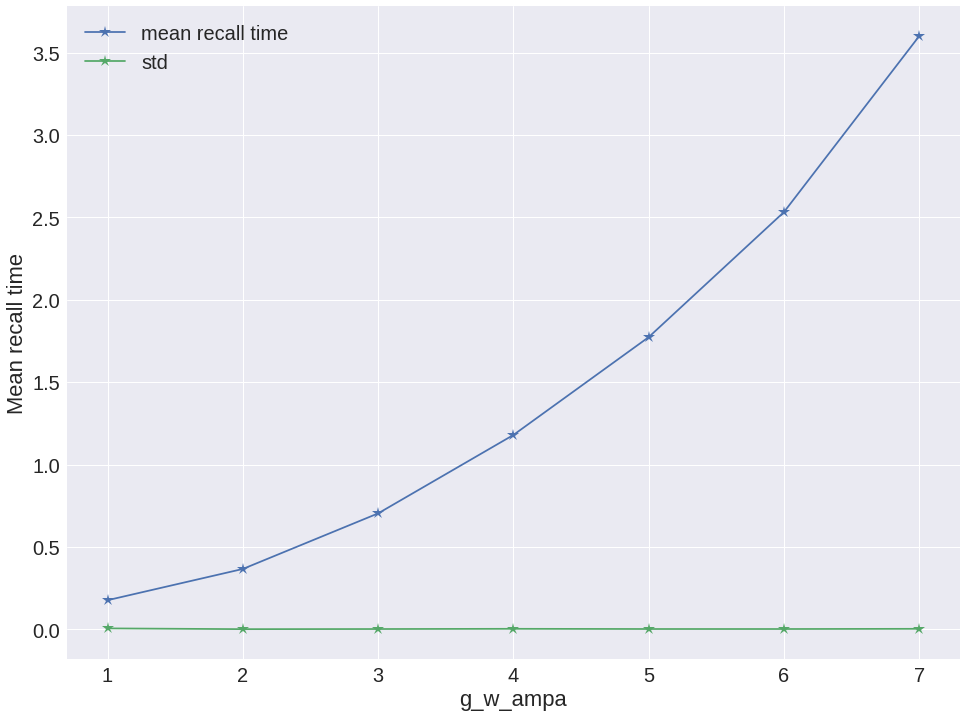

In [30]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_w_ampa_range, mean_g_w_ampa, '*-', markersize=13, label='mean recall time')
ax.plot(g_w_ampa_range, std_g_w_ampa, '*-', markersize=13, label='std')

ax.set_xlabel('g_w_ampa')
ax.set_ylabel('Mean recall time')

ax.legend();

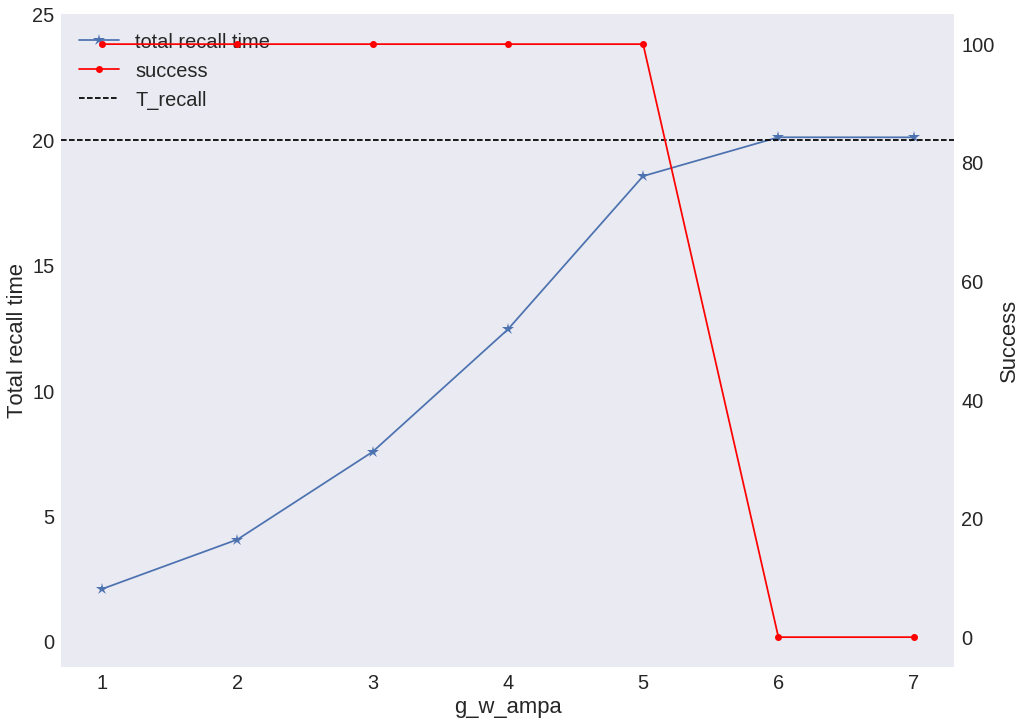

In [31]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(g_w_ampa_range, total_g_w_ampa, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()

ax.set_xlabel('g_w_ampa')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(g_w_ampa_range, successes_g_w_ampa, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])